<a href="https://colab.research.google.com/github/smarvar/Machine-Learnig-practice/blob/master/TP5/TP5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **CLUSTERING**

# Wholesale Customers

The goal of this project is to identify and describe the various customer segments hidden in the data based on their annual spending on diverse product categories, like milk, grocery, region, etc. More info about this datasethere.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
customers = pd.read_csv("https://raw.githubusercontent.com/emmanueliarussi/DataScienceCapstone/master/3_MidtermProjects/ProjectWC/data/wholesale_customers_data.csv")
customers.head(10)

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185
5,2,3,9413,8259,5126,666,1795,1451
6,2,3,12126,3199,6975,480,3140,545
7,2,3,7579,4956,9426,1669,3321,2566
8,1,3,5963,3648,6192,425,1716,750
9,2,3,6006,11093,18881,1159,7425,2098


In [3]:
customers.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


In [4]:
#Verificamos el tipo de cada uno de los atributos para corroborar la uniformidad de los datos. 
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


Observamos la distribución de los features individualmente para ver su dispersion.

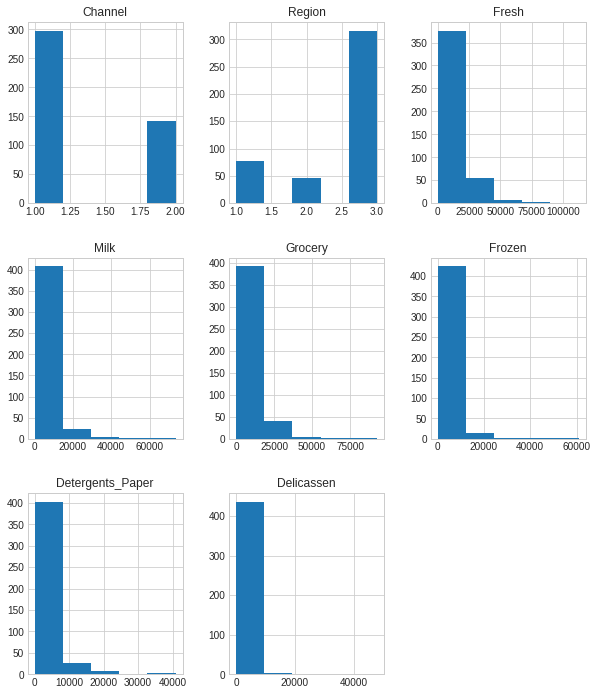

In [5]:
import matplotlib
%matplotlib inline
from matplotlib import style

style.use('seaborn-whitegrid') or plt.style.use('seaborn-whitegrid') 
customers.hist(figsize=(10,12), bins=5)
plt.show()

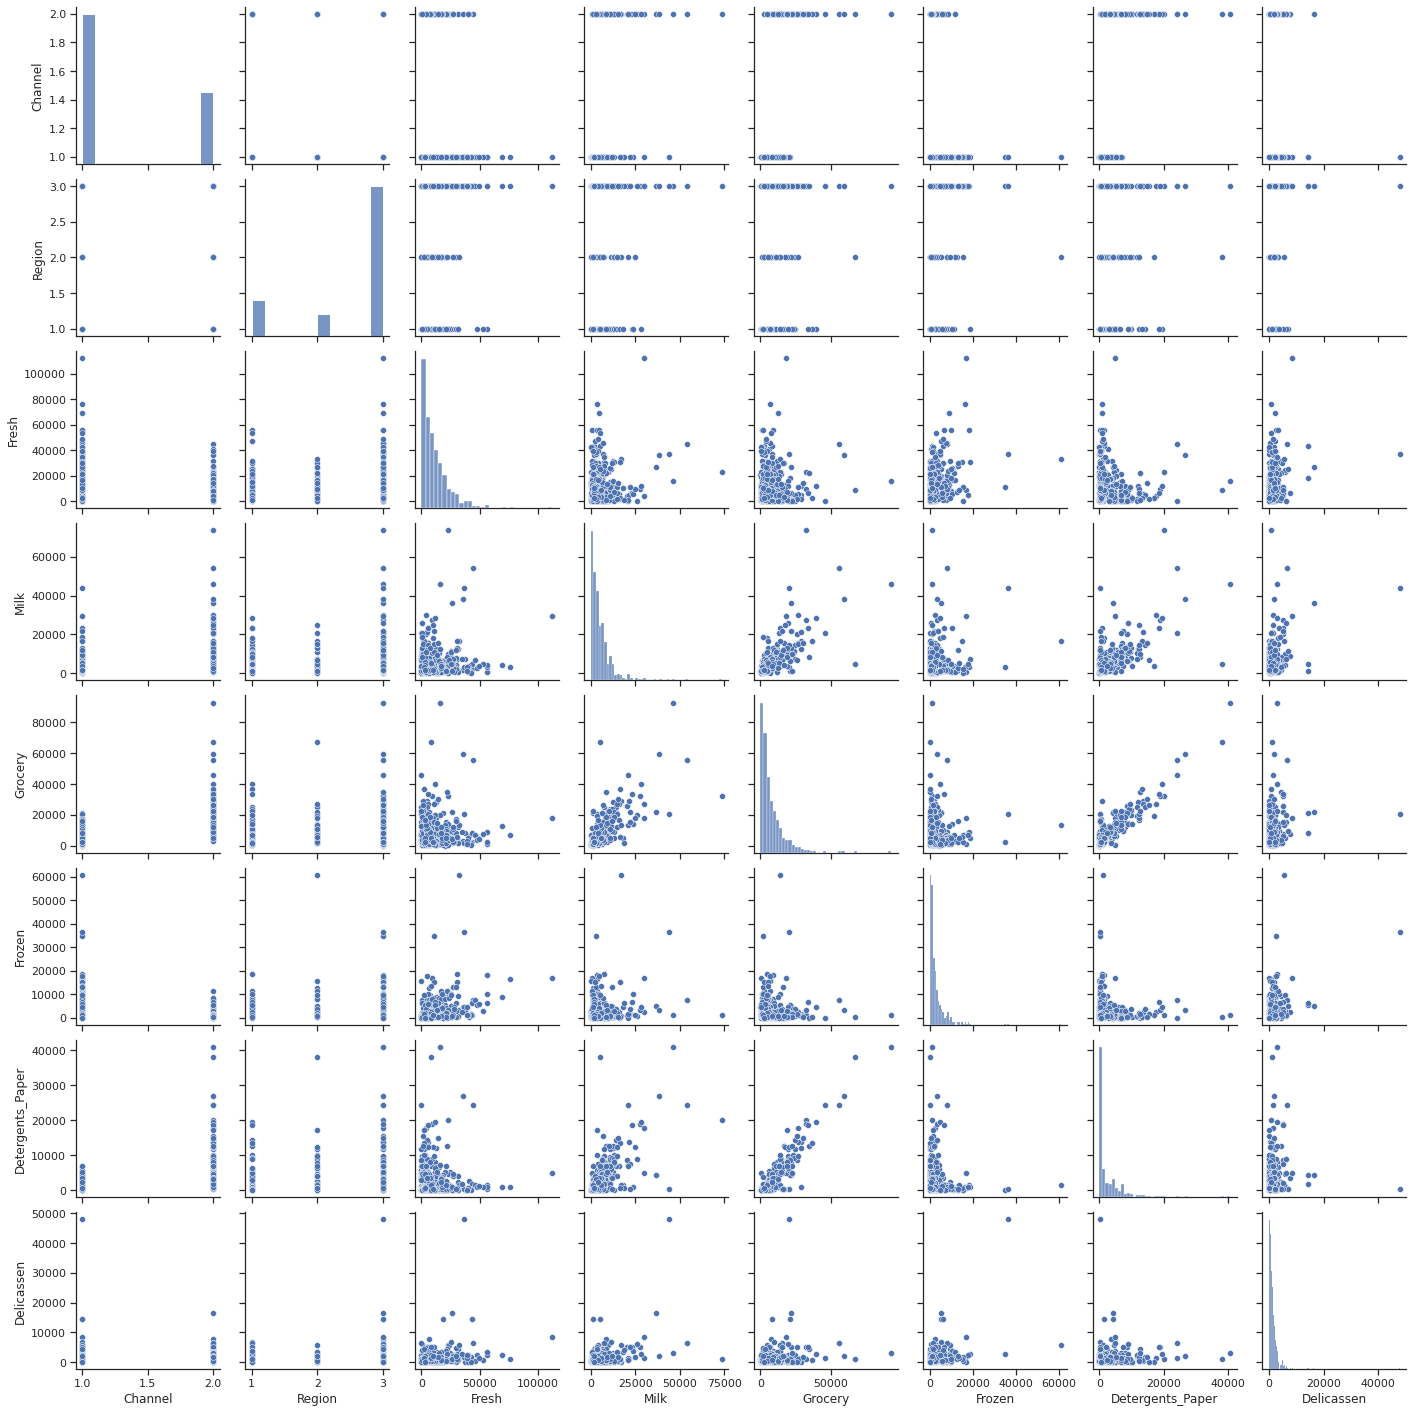

In [ ]:
sns.set(style='ticks')
sns.pairplot(customers.iloc[:,:])

In [6]:
X = np.array(customers.iloc[:,:])

# K-MEANS 

Para determinar el numero de Clusters mas adecuado, se debe comparar la distancia media entre los datos y el centroide encontrado. Lo normal es que el valor de la media disminuira a medida que aumente el valor de K. Sin embargo se considera un valor adecuado aquel en el cual el decenso se hace mas lento. conocido como Punto Codo. Por lo cual iteraremos el algoritmo para un rango de K y luego los visualizaremos, para determinar el punto de codo.

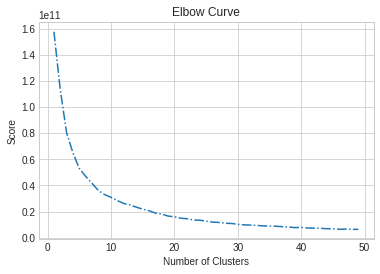

In [34]:
from sklearn.cluster import KMeans

k_range = range(1, 50)
kmeans = [KMeans(n_clusters=a) for a in k_range]

score = [kmeans[a].fit(X).score(X)*-1 for a in range(len(kmeans))]

plt.plot(k_range,score, '-.')
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

Segun lo Observado en Elbow Curve, podria inducirse que el número de K de inflexión podria ser aproximadamente k = 10

In [10]:
# Calculamos los centroides para k = 10
kmeans = KMeans(n_clusters=10).fit(X)
centroids = kmeans.cluster_centers_
print(centroids)

[[1.14814815e+00 2.56481481e+00 1.41632130e+04 2.82362037e+03
  3.49407407e+03 3.73673148e+03 7.76379630e+02 1.07185185e+03]
 [2.00000000e+00 2.47368421e+00 8.21989474e+03 2.08411053e+04
  2.90190000e+04 2.01815789e+03 1.29008421e+04 3.30778947e+03]
 [1.23529412e+00 2.50980392e+00 2.54326863e+04 5.03954902e+03
  6.83743137e+03 4.16488235e+03 1.38688235e+03 2.22572549e+03]
 [1.85882353e+00 2.54117647e+00 4.26796471e+03 9.09678824e+03
  1.47008471e+04 1.41560000e+03 6.43032941e+03 1.44022353e+03]
 [1.00000000e+00 3.00000000e+00 1.12151000e+05 2.96270000e+04
  1.81480000e+04 1.67450000e+04 4.94800000e+03 8.55000000e+03]
 [1.09523810e+00 2.71428571e+00 4.70924762e+04 3.24838095e+03
  4.60966667e+03 5.37900000e+03 7.57714286e+02 2.11171429e+03]
 [2.00000000e+00 3.00000000e+00 2.98625000e+04 5.30807500e+04
  6.00157500e+04 3.26225000e+03 2.79422500e+04 3.08225000e+03]
 [1.00000000e+00 2.50000000e+00 3.47820000e+04 3.03670000e+04
  1.68980000e+04 4.87015000e+04 7.55500000e+02 2.67760000e+04]


In [11]:
# Predicting the clusters
labels = kmeans.predict(X)
labels

array([0, 3, 3, 0, 2, 8, 0, 8, 8, 3, 3, 0, 2, 2, 2, 0, 3, 8, 2, 8, 0, 8,
       2, 1, 2, 0, 0, 0, 1, 5, 2, 8, 2, 2, 8, 3, 2, 3, 3, 5, 2, 0, 3, 3,
       3, 1, 3, 6, 3, 1, 8, 8, 5, 3, 2, 8, 1, 3, 0, 8, 8, 6, 8, 3, 8, 1,
       8, 2, 8, 8, 0, 2, 8, 2, 3, 0, 8, 1, 0, 8, 8, 3, 3, 0, 0, 6, 6, 5,
       8, 2, 0, 0, 1, 0, 3, 8, 8, 8, 8, 0, 3, 3, 8, 5, 0, 0, 3, 3, 8, 1,
       0, 3, 0, 0, 0, 0, 0, 8, 0, 8, 0, 8, 0, 0, 5, 5, 0, 2, 8, 5, 8, 8,
       0, 8, 8, 8, 8, 8, 0, 8, 0, 2, 5, 0, 0, 1, 8, 8, 8, 2, 0, 8, 0, 8,
       8, 3, 3, 0, 3, 3, 3, 0, 0, 1, 3, 3, 3, 8, 8, 8, 3, 1, 8, 3, 8, 3,
       5, 0, 0, 8, 0, 4, 3, 7, 8, 8, 8, 3, 3, 3, 0, 0, 8, 3, 8, 0, 2, 3,
       0, 0, 3, 1, 2, 8, 8, 3, 8, 8, 8, 3, 0, 1, 8, 8, 3, 3, 1, 0, 3, 8,
       0, 3, 8, 8, 8, 0, 2, 8, 8, 0, 0, 8, 2, 8, 0, 8, 8, 0, 8, 5, 2, 2,
       0, 0, 3, 3, 8, 0, 0, 8, 8, 1, 8, 2, 0, 2, 0, 8, 5, 5, 8, 8, 2, 8,
       3, 3, 3, 0, 3, 0, 8, 8, 8, 5, 8, 8, 2, 0, 0, 0, 8, 0, 5, 2, 5, 5,
       8, 0, 0, 5, 8, 8, 8, 3, 2, 8, 0, 8, 3, 8, 0,

In [12]:
from sklearn.metrics import pairwise_distances_argmin_min 
# Encontramos el cliente mas cercano al centroide encontrado 
closest, _ = pairwise_distances_argmin_min(centroids, X)
closest

array([162,  49,  89, 215, 181, 239,  61, 183, 291, 333])

Evaluando metricas que dan un puntaje sin tener en cuenta la etiqueta real de los atributos

In [13]:
import sklearn.metrics 
sklearn.metrics.calinski_harabasz_score(X, labels)

198.37173495520761

In [14]:
k_range = range(1, 50)
kmeans = [KMeans(n_clusters=a) for a in k_range]
labels_2 = [kmeans[a].fit(X).predict(X) for a in range(len(k_range))]

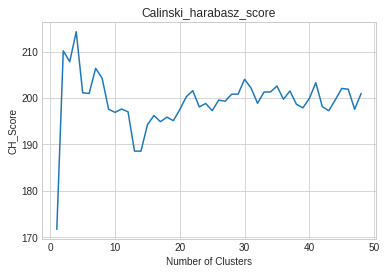

In [15]:
#calinski_harabasz_score
ch_score=[]
for a in range(1,len(labels_2)):
  ch_score.append(sklearn.metrics.calinski_harabasz_score(X, labels_2[a]) )
plt.plot(k_range[:48],ch_score)
plt.xlabel('Number of Clusters')
plt.ylabel('CH_Score')
plt.title('Calinski_harabasz_score')
plt.show()

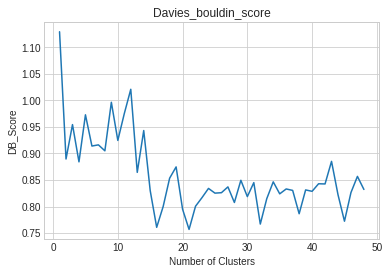

In [16]:
#davies_bouldin_score
db_score=[]
for a in range(1,len(labels_2)):
  db_score.append(sklearn.metrics.davies_bouldin_score(X, labels_2[a]) )

plt.plot(k_range[:48],db_score)
plt.xlabel('Number of Clusters')
plt.ylabel('DB_Score')
plt.title('Davies_bouldin_score')
plt.show()

A mayor Score de Calinski se logra una mejor distribución de los clusters. Por el contrario con el Score de Davies entre menor sea mejor resultado. Por lo cual para llegar a un concenso se correlacionan las dos graficas en el cual se encuentra como valor adecuado un numero de 16 a 17 Clusters.

**Evaluación de solo 3 atributos para lograr una visalización:**
Con el Objetivo de visualizar el Cluster suprimiremos algunos atributos, evaluando solo 3 de estos para verlo graficamente. En función de uno de los atributos que solo tiene 2 estados como lo es el Channel.

In [17]:
X2 = np.array(customers[["Fresh","Milk","Grocery"]]) # Atributos a evaluar
#X2 = np.array(customers[["Frozen","Detergents_Paper", "Delicassen"]])
y = np.array(customers['Channel']) # En función de este atributo

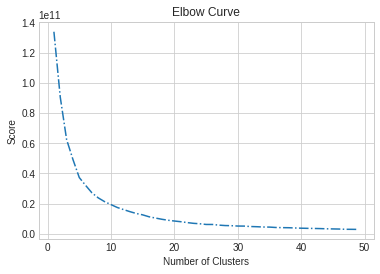

In [24]:
# Validamos el Elbow Code para ver si cambia el valor de K
k_range = range(1, 50)
kmeans = [KMeans(n_clusters=a) for a in k_range]
score = [kmeans[a].fit(X2).score(X2)*-1 for a in range(len(kmeans))]

plt.plot(k_range,score, '-.')
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

In [25]:
# Calculamos los centroides para k = 10
kmeans = KMeans(n_clusters=10).fit(X2)
centroids = kmeans.cluster_centers_
print(centroids)

[[28715.         51290.33333333 24767.66666667]
 [15374.65306122  2647.02040816  3533.44897959]
 [26060.86956522  5772.89130435  7566.26086957]
 [85779.66666667 12503.66666667 12619.66666667]
 [ 8086.78571429 18674.         34719.28571429]
 [44408.10526316  3175.36842105  4057.47368421]
 [ 4569.20833333  7888.61111111 10539.77777778]
 [32175.         46275.         69316.33333333]
 [ 4777.77931034  2361.63448276  2937.70344828]
 [ 4212.86486486 12513.62162162 19895.45945946]]


In [26]:
labels = kmeans.predict(X2)
labels

array([1, 6, 6, 1, 2, 6, 1, 6, 8, 9, 6, 1, 2, 2, 2, 1, 6, 8, 2, 6, 1, 8,
       2, 0, 2, 1, 8, 1, 4, 5, 2, 8, 1, 2, 8, 6, 2, 6, 9, 5, 2, 1, 6, 9,
       6, 9, 9, 7, 6, 4, 8, 8, 5, 6, 2, 8, 4, 6, 1, 6, 8, 7, 6, 9, 8, 4,
       8, 2, 8, 8, 1, 2, 8, 2, 6, 1, 8, 4, 1, 8, 8, 6, 6, 1, 1, 7, 0, 5,
       8, 2, 1, 1, 4, 1, 6, 8, 8, 8, 8, 8, 6, 9, 6, 5, 1, 1, 6, 6, 6, 4,
       1, 9, 1, 1, 1, 1, 1, 8, 1, 8, 1, 8, 1, 6, 5, 3, 1, 2, 8, 5, 8, 8,
       1, 8, 8, 8, 6, 6, 1, 8, 1, 2, 5, 1, 1, 4, 8, 8, 8, 2, 1, 8, 1, 8,
       8, 9, 6, 1, 6, 6, 6, 1, 1, 9, 6, 9, 6, 8, 8, 8, 6, 9, 6, 9, 8, 6,
       5, 1, 1, 8, 1, 3, 6, 0, 8, 8, 8, 6, 6, 6, 1, 1, 8, 9, 8, 1, 2, 6,
       1, 8, 9, 9, 2, 8, 8, 9, 8, 8, 8, 9, 1, 4, 8, 6, 6, 9, 4, 1, 6, 8,
       1, 6, 8, 8, 8, 1, 2, 8, 8, 8, 1, 6, 2, 8, 1, 8, 8, 1, 8, 5, 2, 2,
       1, 1, 6, 6, 8, 1, 1, 8, 8, 4, 8, 2, 6, 2, 1, 8, 5, 5, 8, 8, 2, 8,
       9, 9, 9, 1, 9, 1, 8, 8, 6, 5, 8, 8, 2, 8, 1, 1, 8, 1, 5, 2, 3, 5,
       8, 1, 1, 5, 8, 8, 8, 6, 2, 8, 1, 8, 6, 8, 1,

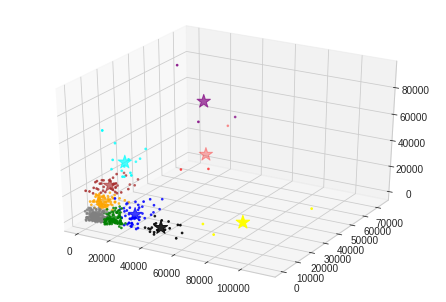

In [27]:
from mpl_toolkits.mplot3d import Axes3D
C = centroids
colores=['red','green','blue','yellow','cyan', 'black','orange','purple', 'gray', 'brown'] # Asigno colores a cada uno de los Cluster
asignar=[]
{a: asignar.append(colores[a])for a in labels} 

fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(X2[:, 0], X2[:, 1], X2[:, 2], c=asignar, s=3)
ax.scatter(C[:, 0], C[:, 1], C[:, 2], marker='*', c=colores, s=200) # Marcamos con una * al centro de cada cluster

# MEAN SHIFT

Para encontrar el número de Clusters más conveniente se debe variar el ancho de banda bandwith el cual varia entre (0 - 1) y con base en las metricas calinski_harabasz_score y davies_bouldin_score. Seleccionar el que mejores resultados genere.

In [29]:
# Prueba inicial con un bandwidth = 0.3
from sklearn.cluster import MeanShift, estimate_bandwidth
from sklearn.datasets import make_blobs

bandwidth = estimate_bandwidth(X, quantile=0.3)
ms=MeanShift(bandwidth=bandwidth, bin_seeding=True)
ms.fit(X)
labels = ms.labels_
cluster_centers = ms.cluster_centers_

labels_unique = np.unique(labels)
n_clusters_ = len(labels_unique)

print("number of estimated clusters : %d" % n_clusters_)

number of estimated clusters : 12


In [30]:
rango = np.arange(0.1,1.1,0.1) # rango de valores de ancho de banda a evaluar

bandwidth = [estimate_bandwidth(X, quantile=a) for a in rango]
labels_2 = [MeanShift(bandwidth=a, bin_seeding=True).fit(X).predict(X) for a in bandwidth]
labels_unique = [np.unique(a) for a in labels_2]
n_clusters_ = [len(a) for a in labels_unique]

print("number of estimated clusters : ", n_clusters_) # numero de cluster encontrados para cada ancho de banda

number of estimated clusters :  [25, 16, 12, 12, 11, 9, 9, 8, 6, 1]


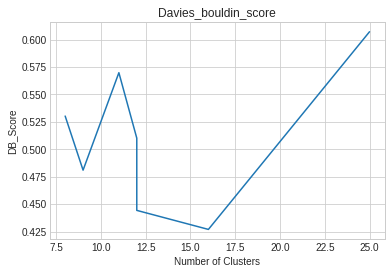

In [31]:
#davies_bouldin_score
db_score=[]
for a in range(0,8):
  db_score.append(sklearn.metrics.davies_bouldin_score(X, labels_2[a]))

plt.plot(n_clusters_[:8],db_score)
plt.xlabel('Number of Clusters')
plt.ylabel('DB_Score')
plt.title('Davies_bouldin_score')
plt.show()

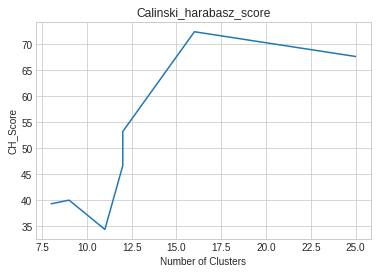

In [32]:
#calinski_harabasz_score
db_score=[]
for a in range(0,8):
  db_score.append(sklearn.metrics.calinski_harabasz_score(X, labels_2[a]))

plt.plot(n_clusters_[:8],db_score)
plt.xlabel('Number of Clusters')
plt.ylabel('CH_Score')
plt.title('Calinski_harabasz_score')
plt.show()

Segun los Score encontrados bajo Calcinski y Davies, el número de clusters más conviente para el dataset es de 16.